### Image Compression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#### K-Means Clustering Algorithm from Scratch 

In [11]:
# each point will find its closests centroid
def find_closest_centroid(X, centroids):
    K= centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range (X.shape[0]):
        distance=[]
        for j in range(K):
            norm_ij= np.linalg.norm(X[i]- centroids[j])
            distance.append(norm_ij)
        idx[i]= np.argmin(distance)
    return idx

In [12]:
# take mean of all the points of a centroid to find new centroid center
def find_mean(X, K, idx):
    m,n = X.shape
    centroids= np.zeros((K,n))

    for k in range(K):
        points=X[idx==k]
        centroids[k]= np.mean(points, axis=0)
    return centroids


In [13]:
def run_kMeans(X, initial_centroids, max_iters=10):
    m, n = X.shape
    K= initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx= np.zeros(m)
    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx = find_closest_centroid(X, centroids)
        previous_centroids = centroids
        centroids= find_mean(X,K, idx)
    return centroids, idx






In [14]:
## randomly select some points as centroid center
def kMeans_init_centroids(X,K):
    randidx= np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

### Image Preprocessing

In [7]:
original_img = plt.imread('bird_small.png')


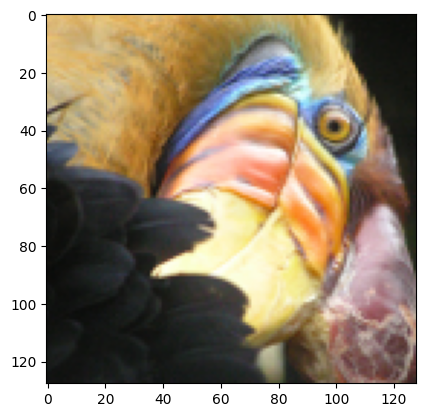

In [8]:
plt.imshow(original_img)

In [9]:
original_img.shape

(128, 128, 3)

In [10]:
X= original_img.reshape(-1,3)

In [11]:
X.shape

(16384, 3)

### Running K-Means Clustering

In [12]:
K= 16
max_iters= 10
initial_centroids = kMeans_init_centroids(X,K)

In [17]:
centroids, idx= run_kMeans(X, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [14]:
idx.shape

(16384,)

In [16]:
idx[:5]

array([6, 6, 6, 6, 6])

In [ ]:
X_recovered = centroids[idx,:]
X_recovered = np.reshape(X_recovered, original_img.shape)

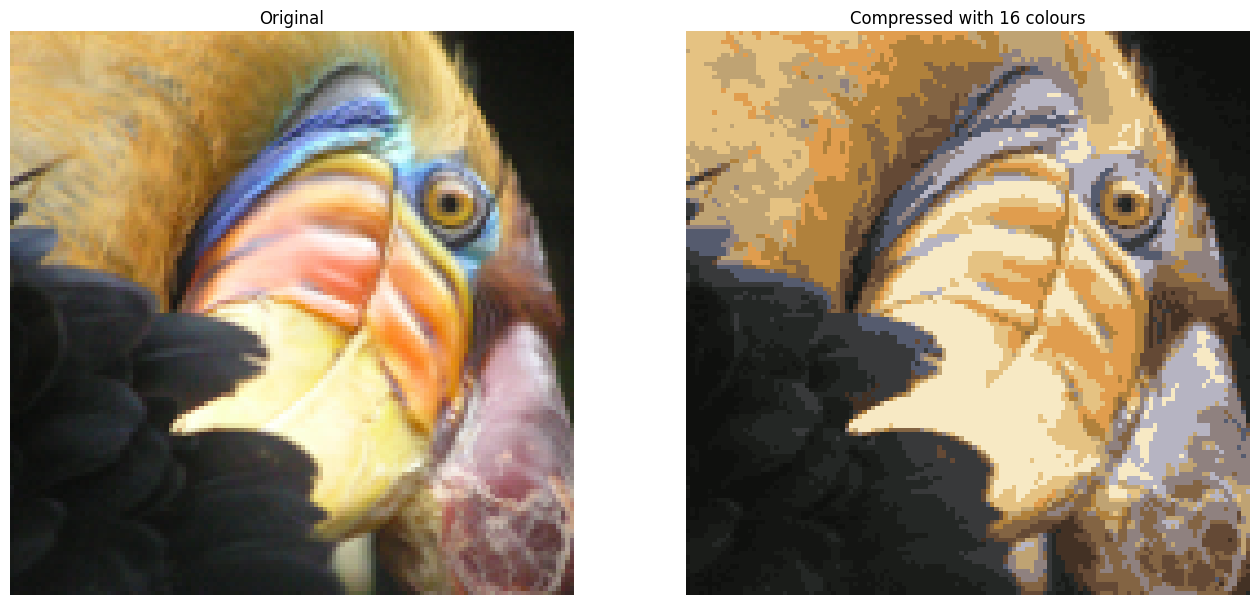

In [21]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')
ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()



In [16]:
def image_preprocessing(image):
    original_img = plt.imread(image)
    plt.imshow(original_img)
    m,n,l = original_img.shape
    if image.lower().endswith(('.jpg', '.jpeg')):
        original_img = original_img / 255.0
        X= original_img.reshape(-1,l)
    else: 
        X= original_img.reshape(-1,l)
        
    return X, original_img

    


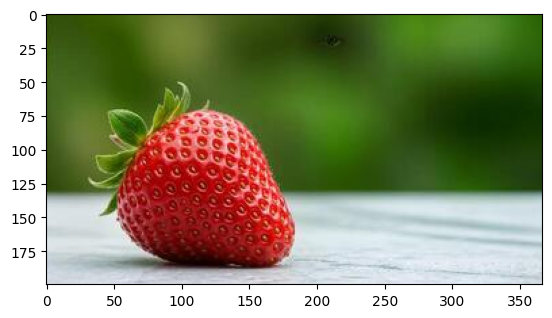

In [17]:
image = 'strawberry.jpg'
X, original_img= image_preprocessing(image)

In [18]:
X.shape

(73400, 3)

In [19]:
initial_centroids= kMeans_init_centroids(X, 16)
centroids, idx= run_kMeans(X,initial_centroids,10)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [21]:
X_recovered = centroids[idx,:]
X_recovered= np.reshape(X_recovered, original_img.shape)

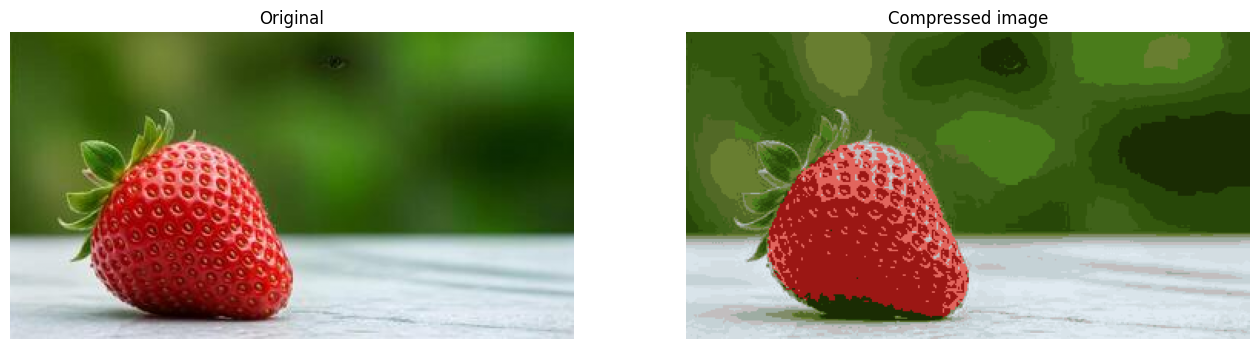

In [23]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')
ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed image')
ax[1].set_axis_off()


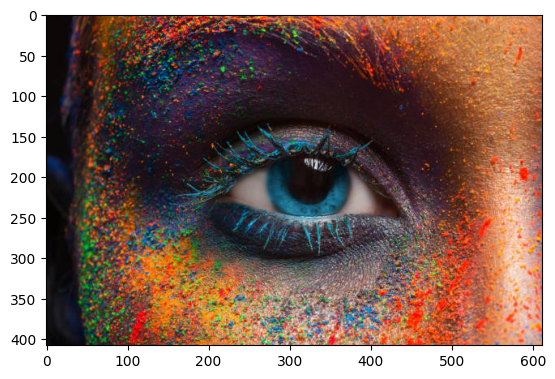

In [ ]:
image = 'eye.jpg'
X, original_img= image_preprocessing(image)

In [25]:
X.shape

(249696, 3)

In [26]:
initial_centroids= kMeans_init_centroids(X,26)
centroids, idx= run_kMeans(X,initial_centroids,10)
X_recovered = centroids[idx,:]
X_recovered= np.reshape(X_recovered, original_img.shape)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


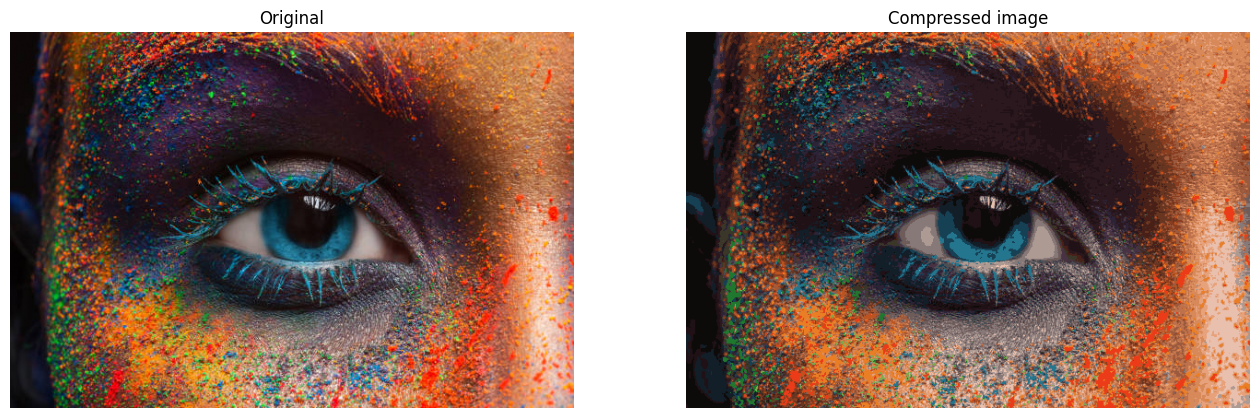

In [28]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')
ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed image')
ax[1].set_axis_off()